# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_ 

I'm using the same terms to rename these columns as the tutorial because I've already been familiarized with them.

In [3]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 4 Math

How many years of data are logged in our dataset? 

In [4]:
print(df["YEAR"].nunique())

33


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [5]:
grouped = df.groupby(["STATE"])["AVG_MATH_4_SCORE"].mean()
if (max(grouped['MICHIGAN'], grouped['OHIO']) == grouped['MICHIGAN']):
    print("Michigan")
elif (max(grouped['MICHIGAN'], grouped['OHIO']) == grouped['OHIO']):
    print("Ohio")
else:
    print("Both values are equal")

Ohio


Find the average for your chosen test across all states in 2019

In [6]:
df.groupby(["YEAR"])["AVG_MATH_4_SCORE"].mean()[2019]


np.float64(239.9433962264151)

For each state, find a maximum value for your chosen test score

In [7]:
df.groupby(["STATE"])["AVG_MATH_4_SCORE"].max()

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [8]:
df['INSTRUCTIONAL_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL']
df['REVENUE_PER_STUDENT'] = df['TOTAL_REVENUE'] / df['ENROLL_ALL']
df["EXPENDITURE BY REVENUE"] = df["TOTAL_EXPENDITURE"] / df["TOTAL_REVENUE"]
df['SUPP_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE']/ df['ENROLL_ALL']
df['CAP_EXPENDITURE_PER_STUDENT'] = df['CAPITAL_OUTLAY_EXPENDITURE']/ df['ENROLL_ALL']
df['OTHER_PER_STUDENT'] = df['OTHER_EXPENDITURE']/ df['ENROLL_ALL']

Feature engineering justification: I've created 6 columns -- different types of expenditure per student and total revenue generated per student. I chose to make these columns because I think it would be neat to check which type of expenditure correlates well with our response variable, and maybe check if revenue generated from a student impacts their score in any way. I will be checking correlation between Grade 4 Math and all other columns.

In [9]:
df.corr(method= 'pearson', numeric_only = True)["AVG_MATH_4_SCORE"]

YEAR                                     0.641322
ENROLL_ALL_EST                          -0.017301
TOTAL_REVENUE                            0.138755
FEDERAL_REVENUE                          0.090260
STATE_REVENUE                            0.102318
LOCAL_REVENUE                            0.175046
TOTAL_EXPENDITURE                        0.134774
INSTRUCTION_EXPENDITURE                  0.138094
SUPPORT_SERVICES_EXPENDITURE             0.143808
OTHER_EXPENDITURE                        0.043537
CAPITAL_OUTLAY_EXPENDITURE               0.074261
ENROLL_PREK                              0.105312
ENROLL_KINDER                           -0.024731
ENROLL_4                                -0.027814
ENROLL_8                                -0.009415
ENROLL_12                                0.037892
ENROLL_PRIMARY                          -0.023409
ENROLL_HS                               -0.002390
ENROLL_ALL                              -0.012243
AVG_MATH_4_SCORE                         1.000000


I'd like to use 5 predictors for my model based on the results here. We have three columns that correlate highly with the response variable (Average scores of 4th grade reading, 8th grade reading and 8th grade math.) However, I also want to explore the impact of revenue and expenditure on the model, since these features perform better than the rest of the columns in correlation.

Note: Correlation does not equal causation, so I think using more predictors will help to make sure that multiple facets of the data can help bring about results.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '4th Grade Math Score')

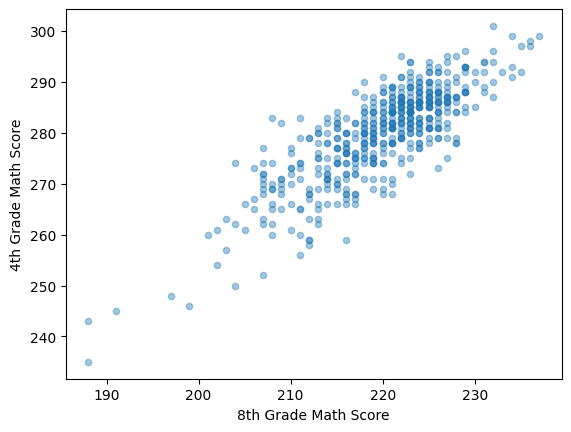

In [10]:
df.plot.scatter(x='AVG_READING_4_SCORE', y='AVG_MATH_8_SCORE', alpha=0.4)
plt.xlabel('8th Grade Math Score')
plt.ylabel('4th Grade Math Score')

Above, I've plotted a scatterplot for the predictor with the highest correlation with the response variable. As you can see, there is a very clear positive correlation: as 8th grade math score goes higher for a particular state and year, so does the same for 4th grade math scores. 

**Visualization 2**

Text(0, 0.5, '4th Grade Math Score')

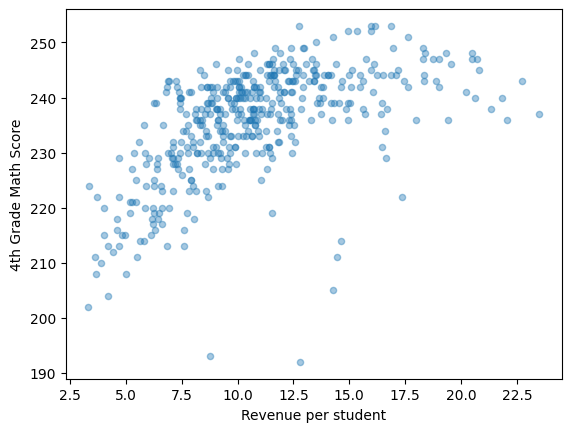

In [11]:
df.plot.scatter(x='REVENUE_PER_STUDENT', y='AVG_MATH_4_SCORE', alpha=0.4)
plt.xlabel('Revenue per student')
plt.ylabel('4th Grade Math Score')

Above, I've plotted a scatterplot for the predictor with the medium correlation with the response variable. There is a positive correlation: as 4th grade math score goes higher for a particular state and year, so does the same for revenue generated per student. However, there are many outliers, and after a point (about 17.5 per student), the 4th grade math score stay stagnant.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df[['INSTRUCTIONAL_EXPENDITURE_PER_STUDENT','AVG_READING_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_8_SCORE', 'REVENUE_PER_STUDENT']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']
y.fillna(y.median(), inplace=True)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=123)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a). I'm using LassoCV to train the data

In [15]:
# import your sklearn class here
from sklearn.linear_model import LassoCV

In [16]:
# create your model here
model = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=123)

In [17]:
model.fit(X_train, y_train)

LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10], random_state=123)

In [18]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [19]:
print(model.intercept_)
print(model.coef_)

37.73721944949352
[-0.49953548  0.50827008  0.60751907 -0.30868293  0.27131053]


In [20]:
model.score(X_test, y_test)

0.9002646847415231

In [21]:
np.mean(model.predict(X_test)-y_test)

np.float64(0.2695515309046636)

In [22]:
np.mean((model.predict(X_test)-y_test)**2)**0.5

np.float64(2.095688660275201)

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

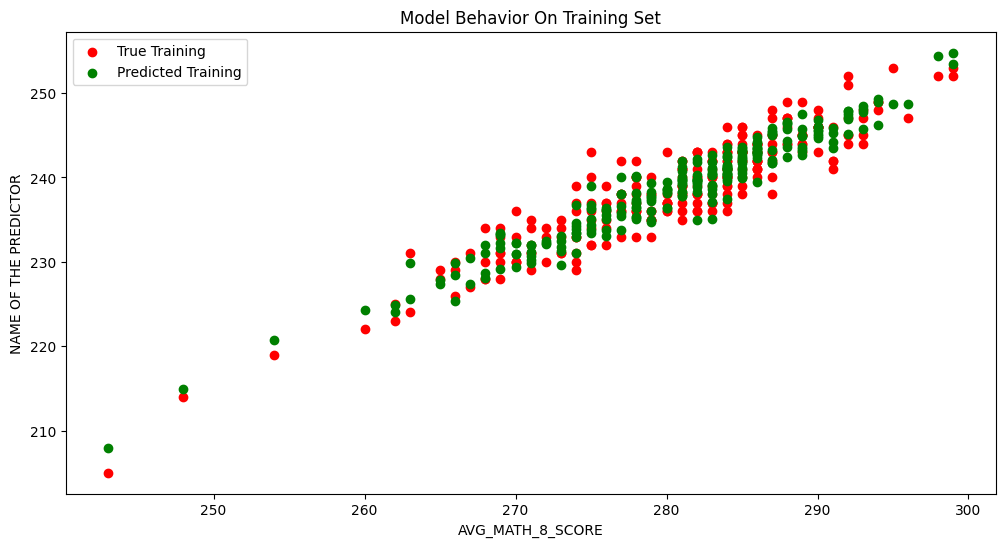

In [23]:
col_name = 'AVG_MATH_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

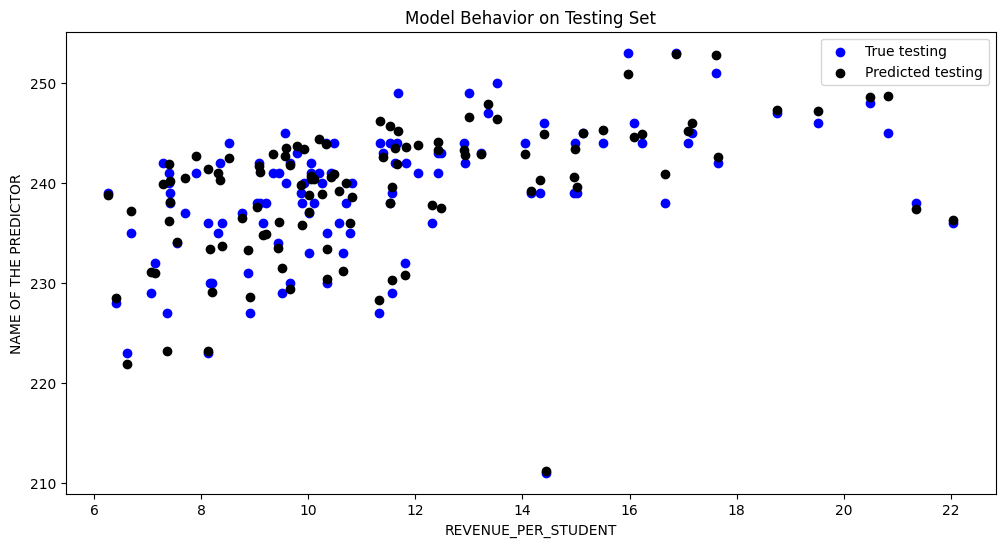

In [24]:
col_name = 'REVENUE_PER_STUDENT'
f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior on Testing Set")